<a href="https://colab.research.google.com/github/JF11579/New-Stuff/blob/main/CGR_Pcts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Options

In [115]:
options(scipen=999)

options(repr.plot.width=14, repr.plot.height=10)

# Packaages

In [116]:
library(tidyverse)
library(ggplot2)
library(lubridate)
install.packages("RColorBrewer")
library(RColorBrewer)
install.packages("wesanderson")
library(wesanderson)
install.packages("gapminder")
library(gapminder)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Data

In [132]:
gender_pct <- read.csv("/content/CGR_2_Gender - Compiled_2.csv")

In [133]:
head(gender_pct)
tail(gender_pct)

,Year,County,Crime,Total.Arrests,Male,Female,Not.Reported,Year_19,County_19,Crime_19,⋯,Male_19,Female_19,Not.Reported_19,Pct_Change_Total_Arrests,PctChangTotCorected,PctChangeMale,PctChangeFemale,TotalChange,ChangeMale,ChangeFemale
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,2016,Cayuga,Total Arrests,1374,969,405,0,2019,Cayuga,Total Arrests,⋯,905,336,0,0.9032023,-0.09679767,0.9339525,0.8296296,-133,-64,-69
2,2016,Cayuga,Felony Total,431,326,105,0,2019,Cayuga,Felony Total,⋯,309,102,0,0.9535963,-0.04640371,0.9478528,0.9714286,-20,-17,-3
3,2016,Cayuga,Drug,51,36,15,0,2019,Cayuga,Drug,⋯,43,23,0,1.2941176,0.29411765,1.1944444,1.5333333,15,7,8
4,2016,Cayuga,Violent,104,88,16,0,2019,Cayuga,Violent,⋯,46,14,0,0.5769231,-0.42307692,0.5227273,0.8750000,-44,-42,-2
5,2016,Cayuga,DWI,38,25,13,0,2019,Cayuga,DWI,⋯,18,7,0,0.6578947,-0.34210526,0.7200000,0.5384615,-13,-7,-6
6,2016,Cayuga,Other,238,177,61,0,2019,Cayuga,Other,⋯,202,58,0,1.0924370,0.09243697,1.1412429,0.9508197,22,25,-3


,Year,County,Crime,Total.Arrests,Male,Female,Not.Reported,Year_19,County_19,Crime_19,⋯,Male_19,Female_19,Not.Reported_19,Pct_Change_Total_Arrests,PctChangTotCorected,PctChangeMale,PctChangeFemale,TotalChange,ChangeMale,ChangeFemale
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
149,2016,Yates,Other,43,29,14,0,2019,Yates,Other,⋯,31,13,0,1.0232558,0.02325581,1.0689655,0.9285714,1,2,-1
150,2016,Yates,Misdemeanor Total,235,158,77,0,2019,Yates,Misdemeanor Total,⋯,153,51,0,0.8680851,-0.13191489,0.9683544,0.6623377,-31,-5,-26
151,2016,Yates,Drug,20,16,4,0,2019,Yates,Drug,⋯,22,6,0,1.4000000,0.40000000,1.3750000,1.5000000,8,6,2
152,2016,Yates,DWI,56,38,18,0,2019,Yates,DWI,⋯,42,16,0,1.0357143,0.03571429,1.1052632,0.8888889,2,4,-2
153,2016,Yates,Property,52,27,25,0,2019,Yates,Property,⋯,19,7,0,0.5000000,-0.50000000,0.7037037,0.2800000,-26,-8,-18
154,2016,Yates,Other,107,77,30,0,2019,Yates,Other,⋯,70,22,0,0.8598131,-0.14018692,0.9090909,0.7333333,-15,-7,-8


In [134]:
str(gender_pct)

'data.frame':	154 obs. of  21 variables:
 $ Year                    : int  2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 ...
 $ County                  : chr  "Cayuga" "Cayuga" "Cayuga" "Cayuga" ...
 $ Crime                   : chr  "Total Arrests" "Felony Total" "Drug" "Violent" ...
 $ Total.Arrests           : int  1374 431 51 104 38 238 943 77 173 316 ...
 $ Male                    : int  969 326 36 88 25 177 643 59 125 201 ...
 $ Female                  : int  405 105 15 16 13 61 300 18 48 115 ...
 $ Not.Reported            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Year_19                 : int  2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 ...
 $ County_19               : chr  "Cayuga" "Cayuga" "Cayuga" "Cayuga" ...
 $ Crime_19                : chr  "Total Arrests" "Felony Total" "Drug" "Violent" ...
 $ Total.Arrests_19        : int  1241 411 66 60 25 260 830 62 135 294 ...
 $ Male_19                 : int  905 309 43 46 18 202 596 41 100 194 ...
 $ Female_19               : int  

# Absolute Change



## Let us first look at the change in Total Crime

In [136]:
Total_Crime <- gender_pct %>%
              filter(Crime == "Total Arrests")

In [137]:
Total_Crime

Year,County,Crime,Total.Arrests,Male,Female,Not.Reported,Year_19,County_19,Crime_19,⋯,Male_19,Female_19,Not.Reported_19,Pct_Change_Total_Arrests,PctChangTotCorected,PctChangeMale,PctChangeFemale,TotalChange,ChangeMale,ChangeFemale
<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
2016,Cayuga,Total Arrests,1374,969,405,0,2019,Cayuga,Total Arrests,⋯,905,336,0,0.9032023,-0.09679767,0.9339525,0.8296296,-133,-64,-69
2016,Chemung,Total Arrests,2115,1360,755,0,2019,Chemung,Total Arrests,⋯,1434,603,1,0.9635934,-0.03640662,1.0544118,0.7986755,-77,74,-152
2016,Cortland,Total Arrests,1349,967,382,0,2019,Cortland,Total Arrests,⋯,782,292,0,0.7961453,-0.20385471,0.8086867,0.7643979,-275,-185,-90
2016,Livingston,Total Arrests,1352,949,402,1,2019,Livingston,Total Arrests,⋯,682,341,0,0.7566568,-0.24334320,0.7186512,0.8482587,-329,-267,-61
2016,Monroe,Total Arrests,14899,10880,4018,1,2019,Monroe,Total Arrests,⋯,9006,3584,0,0.8450232,-0.15497684,0.8277574,0.8919861,-2309,-1874,-434
2016,Onondaga,Total Arrests,11020,7826,3193,1,2019,Onondaga,Total Arrests,⋯,6729,2793,1,0.8641561,-0.13584392,0.8598262,0.8747260,-1497,-1097,-400
2016,Ontario,Total Arrests,1946,1291,655,0,2019,Ontario,Total Arrests,⋯,1427,640,0,1.0621788,0.06217883,1.1053447,0.9770992,121,136,-15
2016,Schuyler,Total Arrests,333,249,84,0,2019,Schuyler,Total Arrests,⋯,184,79,0,0.7897898,-0.21021021,0.7389558,0.9404762,-70,-65,-5
2016,Seneca,Total Arrests,825,550,274,1,2019,Seneca,Total Arrests,⋯,430,198,1,0.7624242,-0.23757576,0.7818182,0.7226277,-196,-120,-76


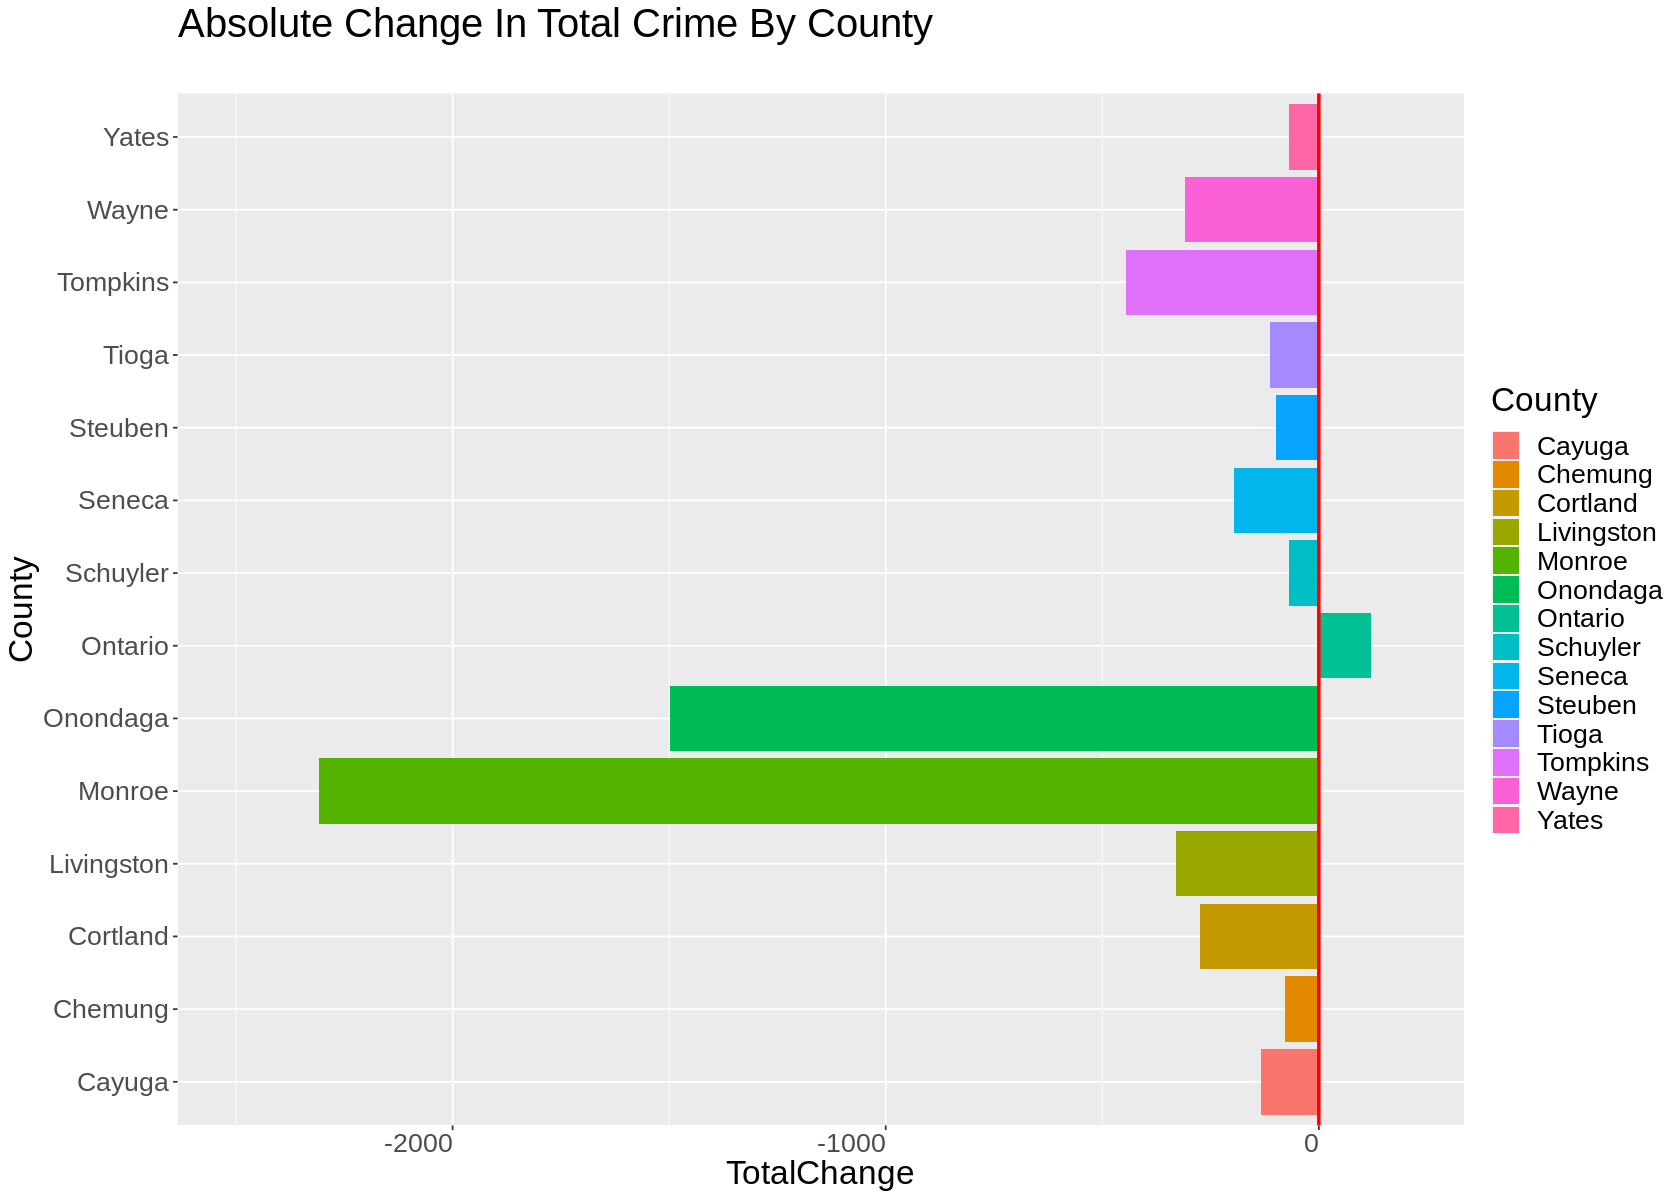

In [119]:
ggplot(Total_Crime, aes(x= County , y = TotalChange , fill = County)) +
        geom_bar(stat = "identity") +
        theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1))+
                                ylim(-2500,200)+
        geom_hline(yintercept= 0, linetype="solid", 
                color = "red", size=1)+
                theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1)) +
                labs(title = "Absolute Change In Total Crime By County",
                subtitle = "")+
                coord_flip()

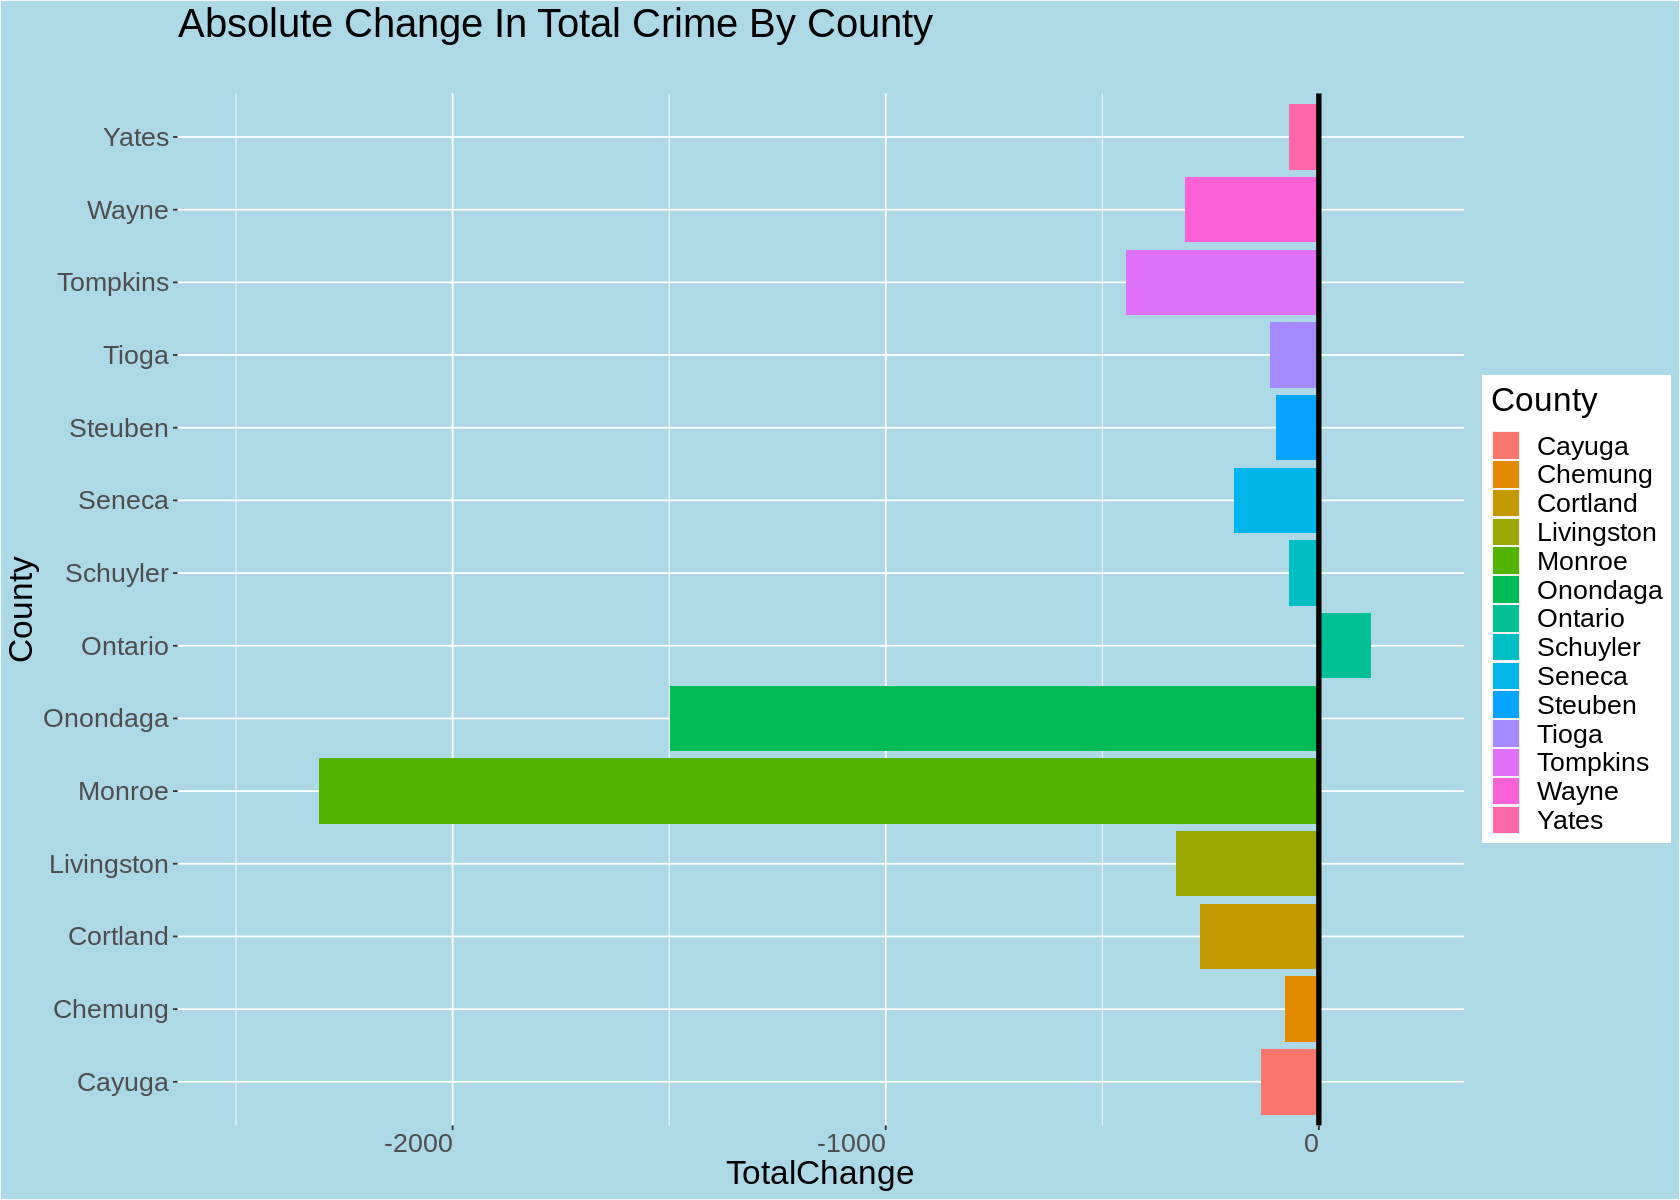

In [142]:
ggplot(Total_Crime, aes(x= County , y = TotalChange , fill = County)) +
        geom_bar(stat = "identity") +
        theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1))+
                                ylim(-2500,200)+
        geom_hline(yintercept= 0, linetype="solid", 
                color = "black", size=1.5)+
                theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1)) +
                labs(title = "Absolute Change In Total Crime By County",
                subtitle = "")+
                 theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue")) +
                coord_flip()

But let us look at this in percentages

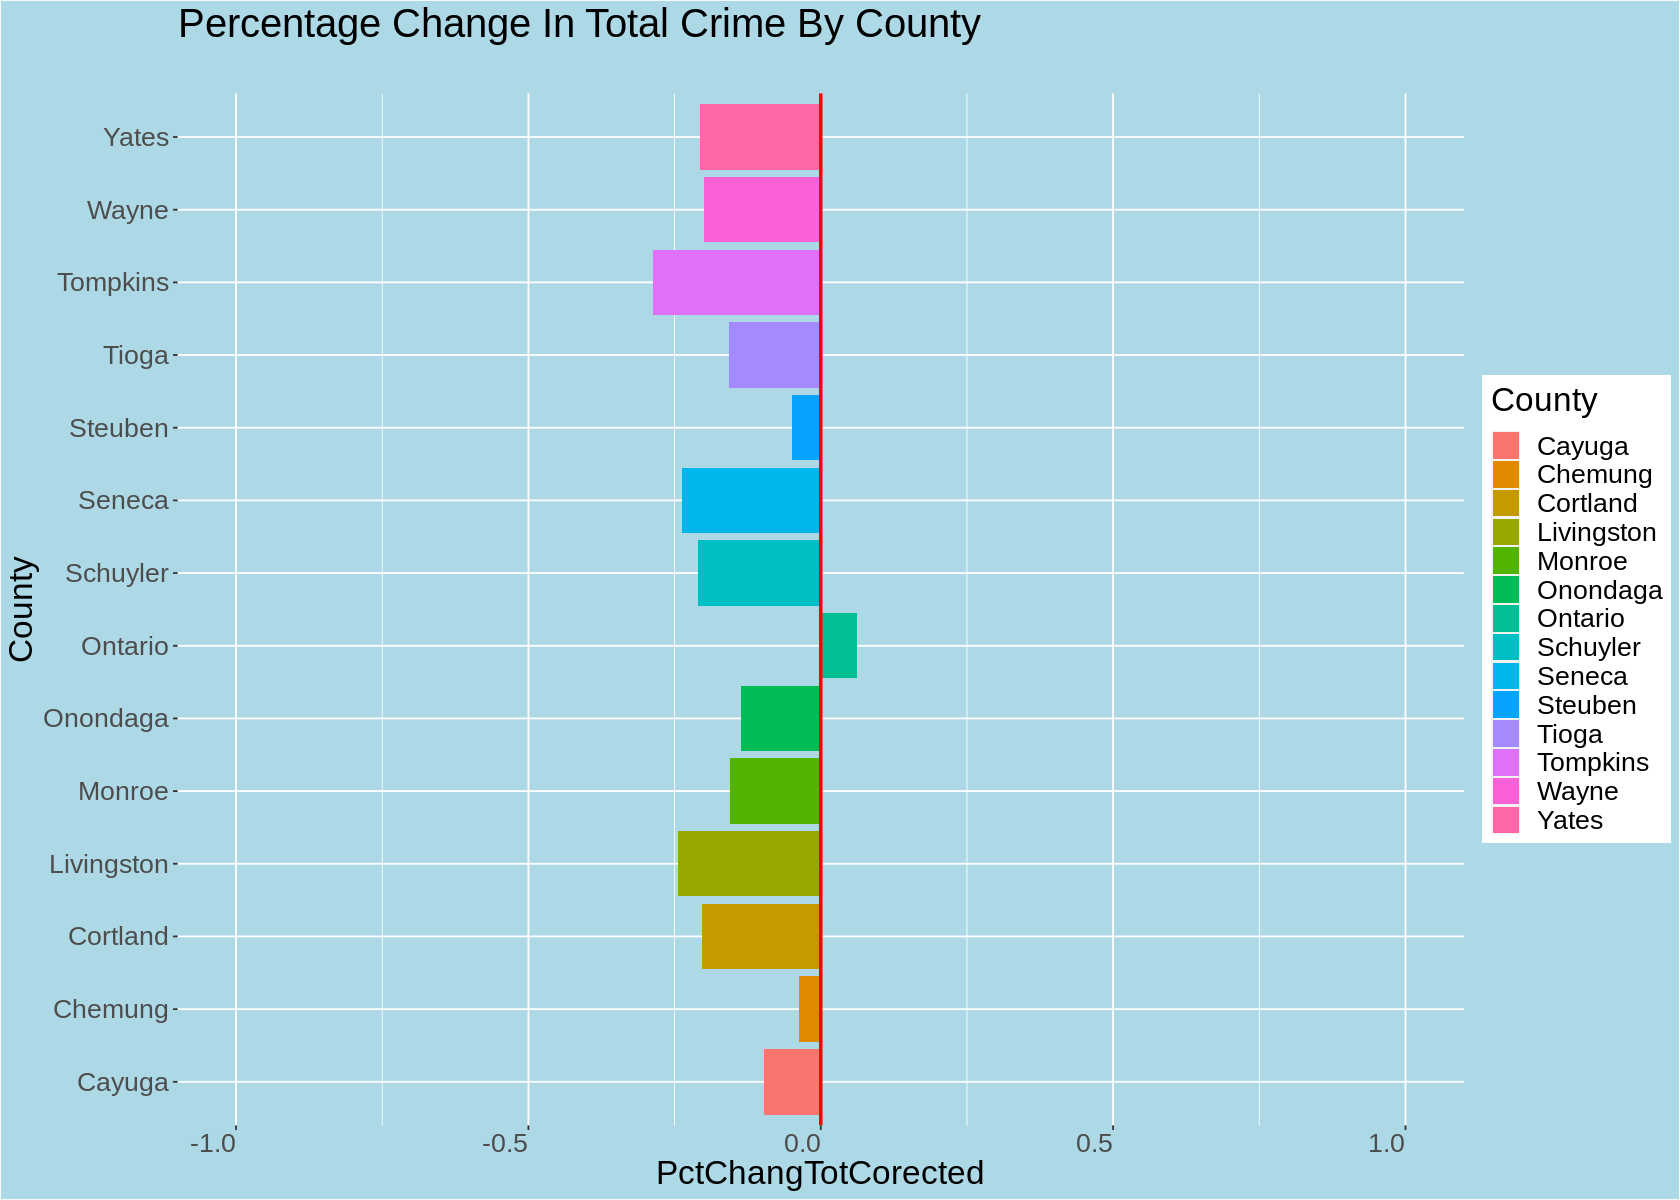

In [140]:
ggplot(Total_Crime, aes(x= County , y = PctChangTotCorected , fill = County)) +
        geom_bar(stat = "identity") +
        theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1))+
                                ylim(-1, 1)+
        geom_hline(yintercept= 0, linetype="solid", 
                color = "red", size=1)+
                theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1)) +
                labs(title = "Percentage Change In Total Crime By County",
                subtitle = "")+
                 theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue")) +
                      coord_flip()

That was a comaprison of county to county for total arrests.  Next let us look check to see if each county had similar trends in crime.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



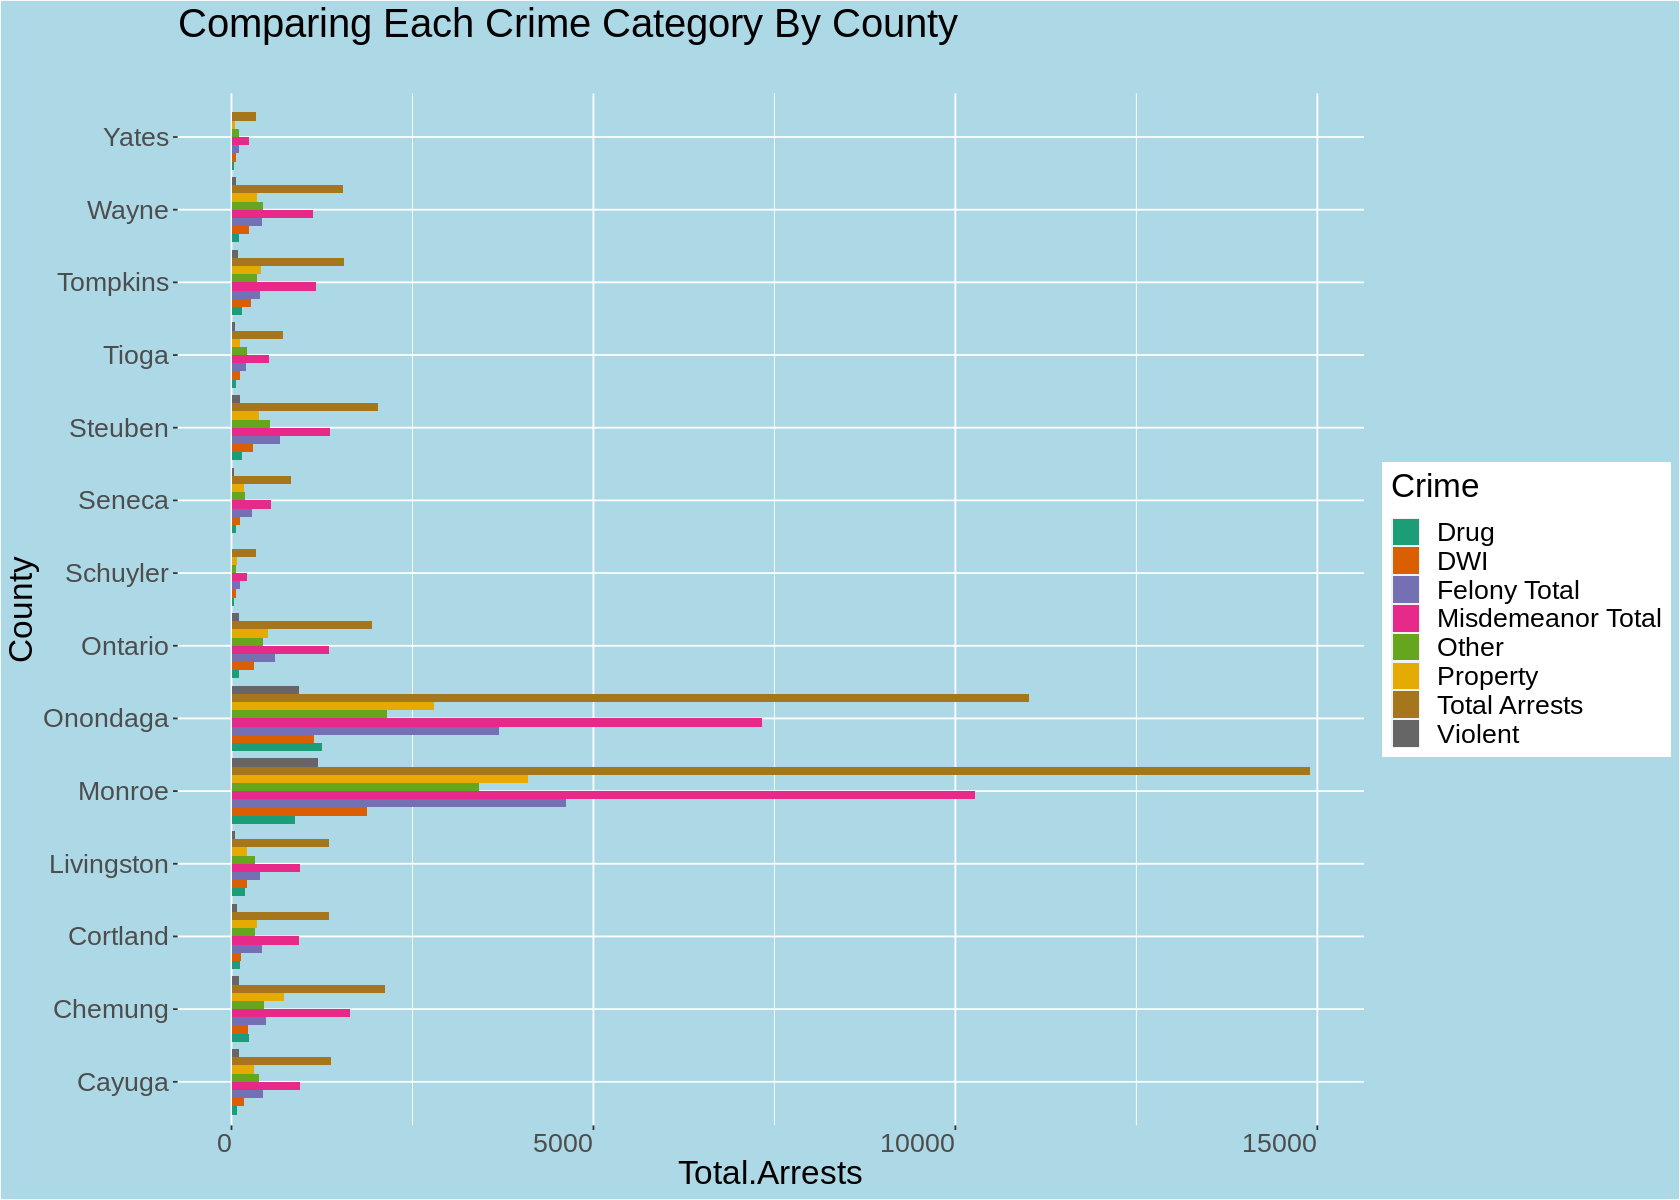

In [147]:
ggplot(gender_pct, aes(County, Total.Arrests , fill = Crime)) +
                              geom_bar(stat = "identity",position = "dodge")+coord_flip()+
                               theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=90, hjust=1))+
                               scale_fill_brewer(palette = "Dark2")+
                               theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1)) +
                       theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue")) +
                       labs(title = "Comparing Each Crime Category By County",
                subtitle = "")+
                      coord_flip()

Better to convert this to percentages

#JUNK

In [64]:
fake_data <- read.csv("/content/Drop_Out_School_FAKE - makebelievedata.csv")

In [65]:
head(fake_data)
tail(fake_data)

,state,drop_out
,<chr>,<dbl>
1,Alabama,7.7
2,Alaska,2.8
3,Arizona,8.5
4,Arkansas,6.8
5,California,6.0
6,Colorado,6.4


,state,drop_out
,<chr>,<dbl>
45,Vermont,-2.7
46,Virginia,-4.2
47,Washington,-7.1
48,West Virginia,-6.7
49,Wisconsin,-4.7
50,Wyoming,-4.3


In [53]:
#fake_data$drop_out <- as.numeric(as.character(fake_data$drop_out))

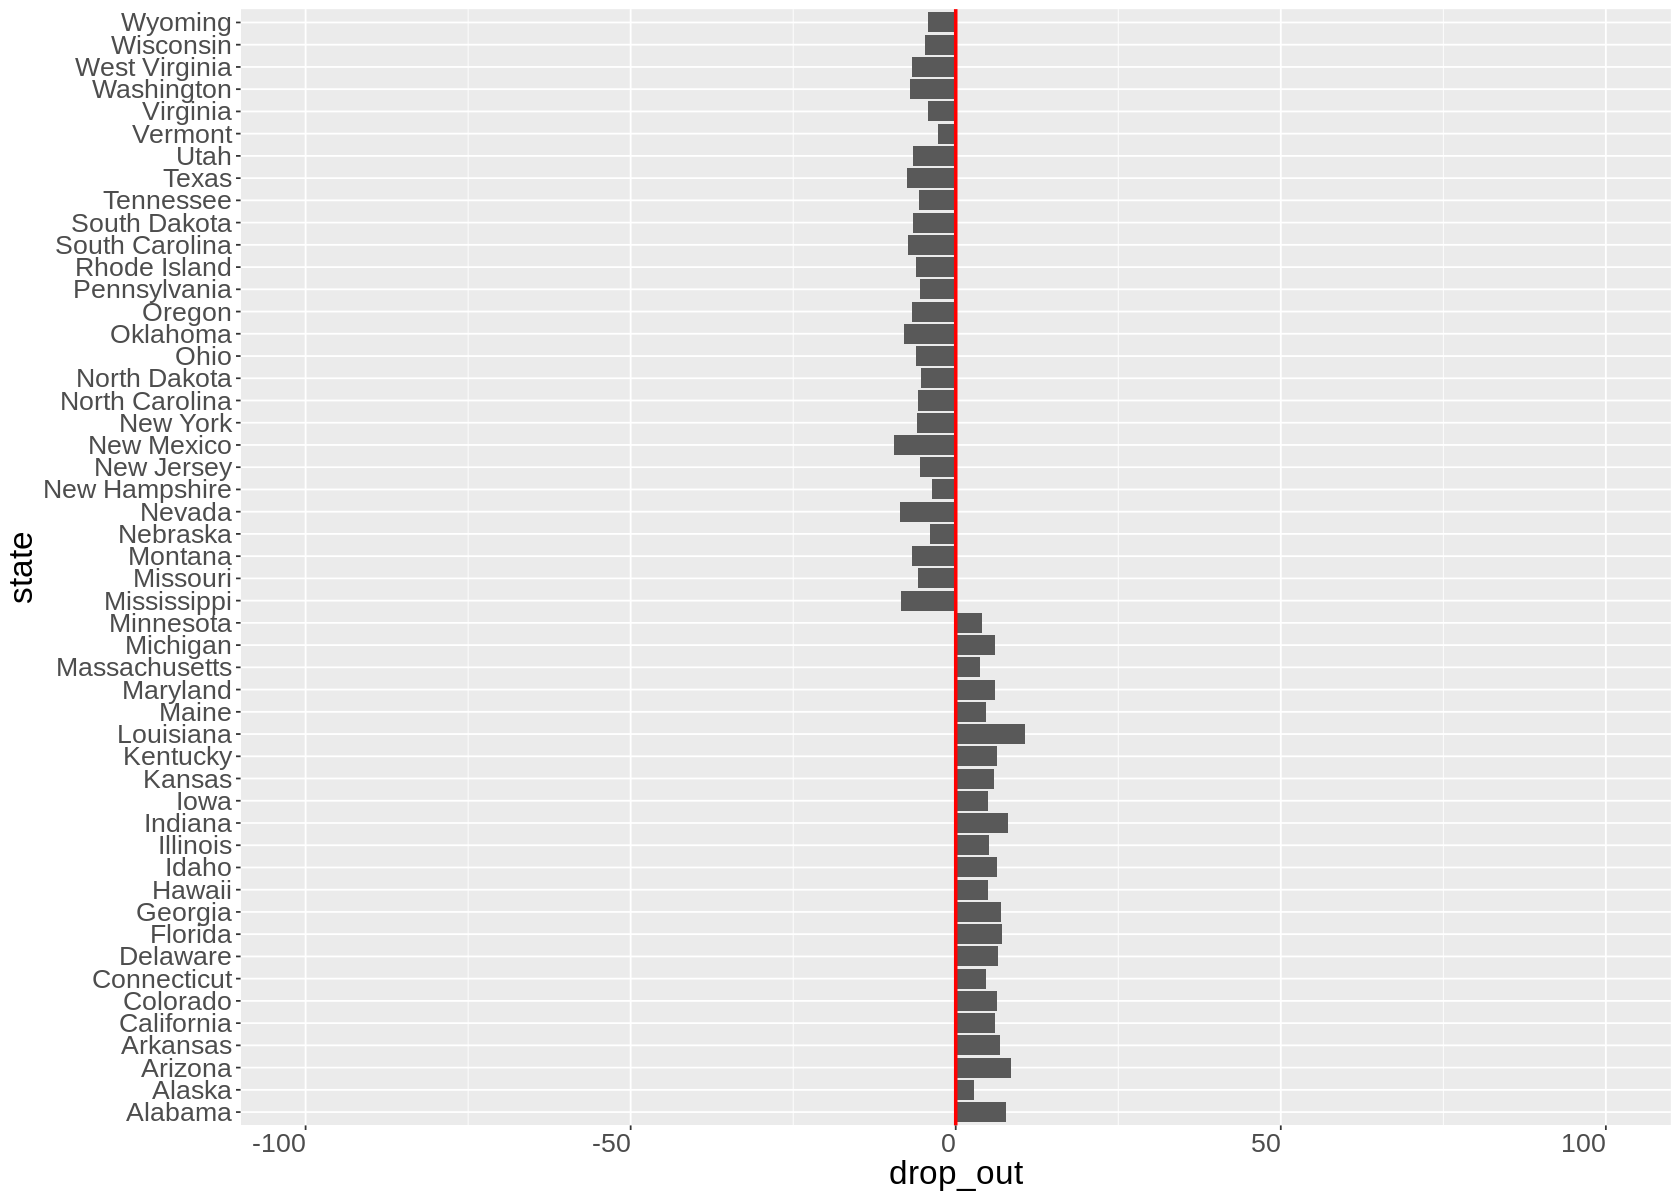

In [66]:
ggplot(fake_data, aes(x= state , y = drop_out)) +
        geom_bar(stat = "identity") +
        theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1))+
                                ylim(-100,100)+
        coord_flip()+
        geom_hline(yintercept= 0, linetype="solid", 
                color = "red", size=1)

In [7]:
data <- structure(list( Date = structure(c(1L, 1L, 1L, 1L, 1L, 2L, 2L, 2L, 2L, 2L), 
                                        .Label = c("11-May-18", "18-May-18"), 
                                        class = "factor"), 
                        Party = structure(c(5L, 3L, 2L, 1L, 4L, 5L, 3L, 2L, 1L, 4L), 
                                         .Label = c("Green", "Liberal", "NDP", "Others", "PC"), 
                                         class = "factor"), 
                        Pct = c(42.3, 28.4, 22.1, 5.4, 1.8, 41.9, 29.3, 22.3, 5, 1.4)), 
                  class = "data.frame", 
                  row.names = c(NA, -10L))

In [8]:
data

Date,Party,Pct
<fct>,<fct>,<dbl>
11-May-18,PC,42.3
11-May-18,NDP,28.4
11-May-18,Liberal,22.1
11-May-18,Green,5.4
11-May-18,Others,1.8
18-May-18,PC,41.9
18-May-18,NDP,29.3
18-May-18,Liberal,22.3
18-May-18,Green,5.0


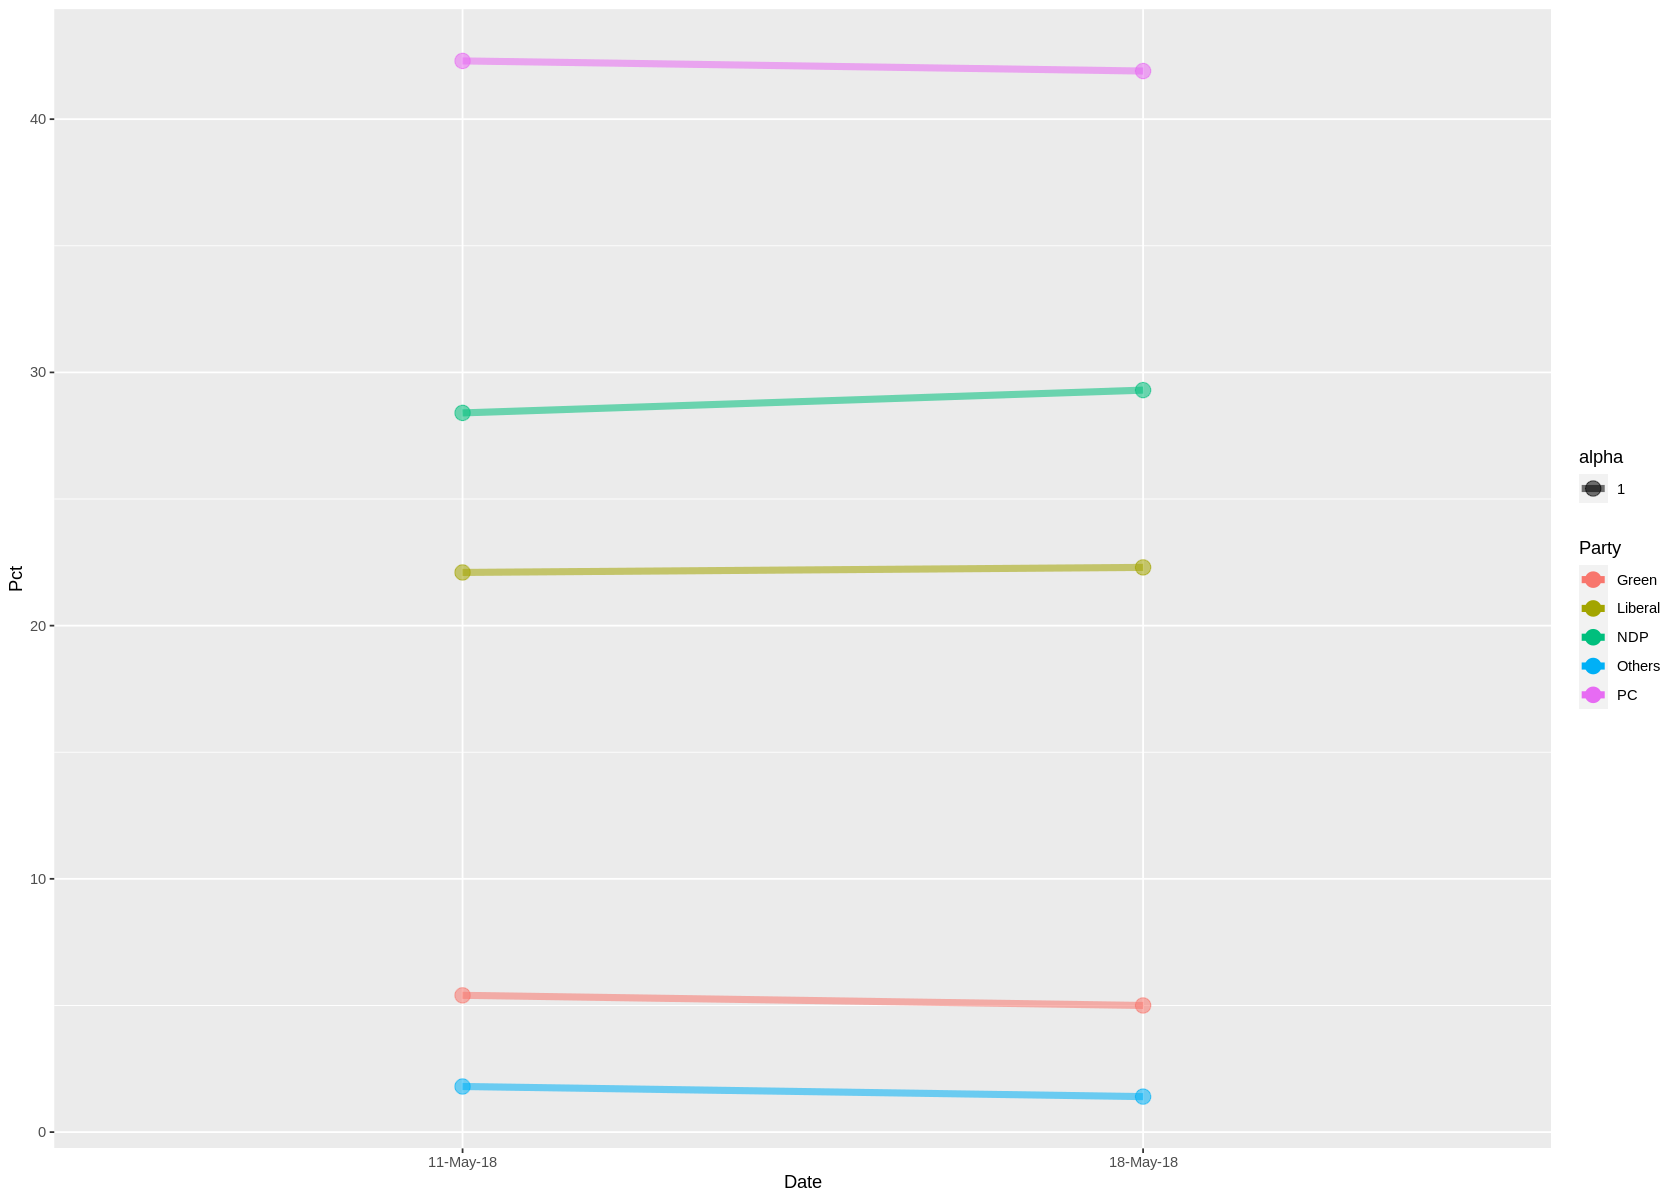

In [9]:
ggplot(data = data, aes(x = Date, y = Pct, group = Party)) +
  geom_line(aes(color = Party, alpha = 1), size = 2) +
  geom_point(aes(color = Party, alpha = 1), size = 4)

# Divergent

In [25]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,car name,mpg_z,mpg_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<chr>
Cadillac Fleetwood,10.4,8,472,205,2.93,5.250,17.98,0,0,3,4,Cadillac Fleetwood,-1.61,below
Lincoln Continental,10.4,8,460,215,3.00,5.424,17.82,0,0,3,4,Lincoln Continental,-1.61,below
Camaro Z28,13.3,8,350,245,3.73,3.840,15.41,0,0,3,4,Camaro Z28,-1.13,below
Duster 360,14.3,8,360,245,3.21,3.570,15.84,0,0,3,4,Duster 360,-0.96,below
Chrysler Imperial,14.7,8,440,230,3.23,5.345,17.42,0,0,3,4,Chrysler Imperial,-0.89,below
Maserati Bora,15.0,8,301,335,3.54,3.570,14.60,0,1,5,8,Maserati Bora,-0.84,below


ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'CarBrand' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste

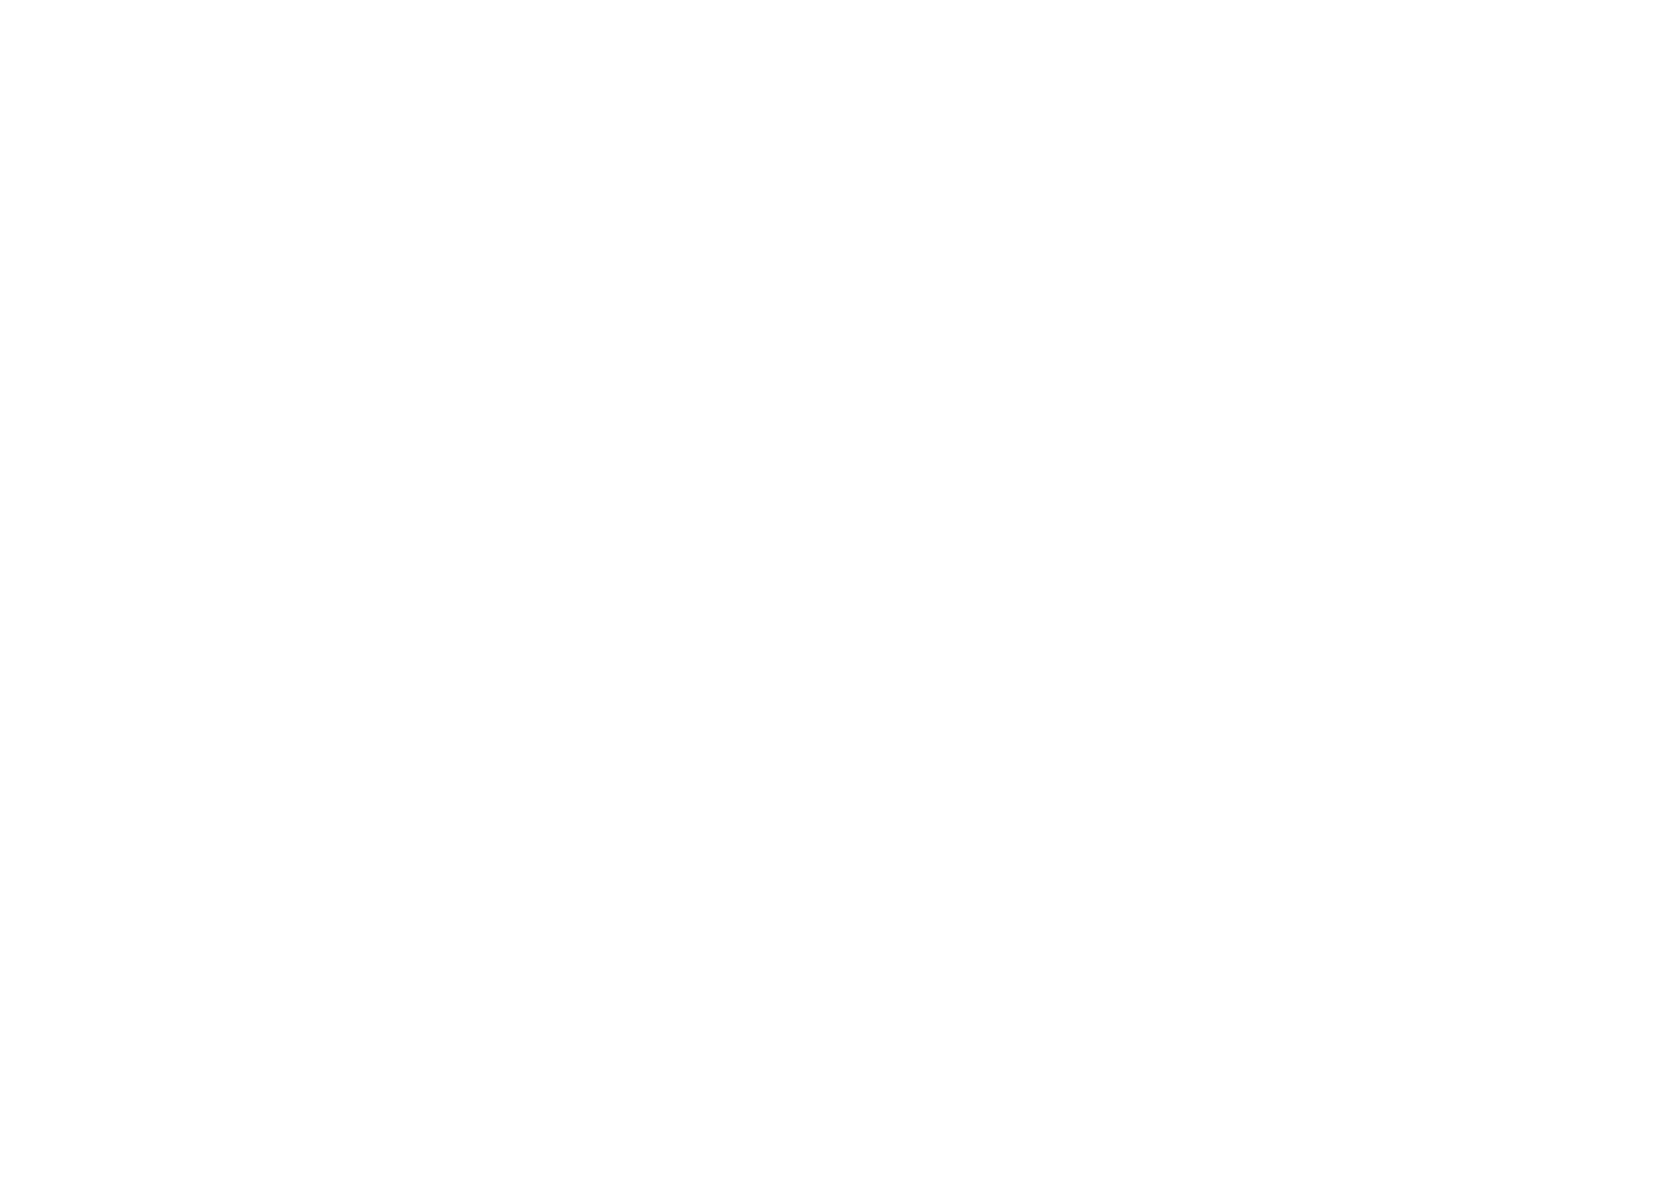

In [24]:
ggplot(mtcars, aes(x=CarBrand, y=mpg_z_score, label=mpg_z_score)) +
geom_bar(stat='identity', aes(fill=mpg_type), width=.5) +
scale_fill_manual(name="Mileage (deviation)",
labels = c("Above Average", "Below Average"),
values = c("above"="#00ba38", "below"="#0b8fd3")) +
labs(subtitle="Z score (normalised) mileage for mtcars'",
title= "Diverging Bar Plot (ggplot2)", caption="Produced by Gary Hutson")+
coord_flip()